In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import folium
# from folium import plugins
# import json
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import NMF, PCA
# from sklearn.cluster import KMeans
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
# import xgboost as xgb
# from src.nlp_helpers import *
# from src.model_helpers import *
%matplotlib inline

import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.style.use('ggplot')

file = pd.read_csv("data/suicide_rates.csv")
file2 = pd.read_csv("data/population/pop_totals.csv")

# preview file data using .head()
file


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [2]:
k = file[file['generation'].str.contains("Boomers")]
k.agg(np.sum)

country               AlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlba...
year                                                            9980242
sex                   malefemalefemalemalemalefemalemalemalefemalefe...
age                   25-34 years25-34 years25-34 years25-34 years25...
suicides_no                                                     2284498
population                                                  13350511729
suicides/100k pop                                              73563.05
country-year          Albania1987Albania1987Albania1988Albania1988Al...
HDI for year                                                    949.212
 gdp_for_year ($)     2,156,624,9002,156,624,9002,126,000,0002,126,0...
gdp_per_capita ($)                                             79750168
generation            BoomersBoomersBoomersBoomersBoomersBoomersBoom...
dtype: object

In [3]:
file.agg(np.sum)

country               AlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlba...
year                                                           55675008
sex                   malemalefemalemalemalefemalefemalefemalemalefe...
age                   15-24 years35-54 years15-24 years75+ years25-3...
suicides_no                                                     6748420
population                                                  51322158436
suicides/100k pop                                             356543.83
country-year          Albania1987Albania1987Albania1987Albania1987Al...
HDI for year                                                   6495.492
 gdp_for_year ($)     2,156,624,9002,156,624,9002,156,624,9002,156,6...
gdp_per_capita ($)                                            469225040
generation            Generation XSilentGeneration XG.I. GenerationB...
dtype: object

In [4]:
file2.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,532760424.0,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,360285439.0,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0


In [5]:
countries = file['country'].unique()
#countries[100]
len(countries)

101

In [6]:
len(countries)

101

In [7]:
np.sort(file['year'].unique())

x_years = np.linspace(2006,2015,10)
x_years

array([2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014.,
       2015.])

In [8]:
file['age'].unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [9]:
file['generation'].unique()

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

In [10]:
max_suicide = file.groupby('suicides/100k pop').aggregate(np.max)
max_suicide

,country,year,sex,age,suicides_no,population,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
suicides/100k pop,,,,,,,,,,,
0.00,Uruguay,2016,male,75+ years,0,8673303,Uruguay2014,0.942,"997,007,926",126352,Silent
0.02,Thailand,2011,male,5-14 years,1,5821000,Thailand1994,0.651,"416,878,162,441",8906,Millenials
0.03,United Kingdom,2010,male,5-14 years,1,3778962,United Kingdom2010,0.906,"926,884,816,754",42486,Millenials
0.04,Spain,2015,male,5-14 years,2,5126281,Spain2015,0.874,"612,939,685,081",36869,Millenials
0.05,United Kingdom,2011,male,5-14 years,2,3949849,United Kingdom2003,0.870,"906,853,273,138",36289,Millenials
...,...,...,...,...,...,...,...,...,...,...,...
182.32,Republic of Korea,2010,male,75+ years,1152,631853,Republic of Korea2010,NaN,"1,094,499,338,703",22994,Silent
185.37,Republic of Korea,2011,male,75+ years,1276,688365,Republic of Korea2011,NaN,"1,202,463,682,634",25157,Silent
187.06,Suriname,2012,male,75+ years,10,5346,Suriname2012,0.711,"4,980,000,000",10227,Silent


In [11]:
suicide_rates = file.drop(labels = 'gdp_per_capita ($)', axis = 1)
suicide_rates = suicide_rates.drop(labels = 'country-year', axis = 1)
suicide_rates = suicide_rates.drop(labels = 'HDI for year', axis = 1)
suicide_rates = suicide_rates.drop(labels = 'age', axis =1)
suicide_rates = suicide_rates.drop(labels = 'sex', axis =1)
suicide_rates = suicide_rates.drop(labels = 'population', axis =1)

In [12]:
suicide_rates

,country,year,suicides_no,suicides/100k pop,gdp_for_year ($),generation
0,Albania,1987,21,6.71,"2,156,624,900",Generation X
1,Albania,1987,16,5.19,"2,156,624,900",Silent
2,Albania,1987,14,4.83,"2,156,624,900",Generation X
3,Albania,1987,1,4.59,"2,156,624,900",G.I. Generation
4,Albania,1987,9,3.28,"2,156,624,900",Boomers
...,...,...,...,...,...,...
27815,Uzbekistan,2014,107,2.96,"63,067,077,179",Generation X
27816,Uzbekistan,2014,9,2.58,"63,067,077,179",Silent
27817,Uzbekistan,2014,60,2.17,"63,067,077,179",Generation Z
27818,Uzbekistan,2014,44,1.67,"63,067,077,179",Generation Z


In [13]:
# for index, row in suicide_rates.iterrows(): 
#     print("Total income in "+ row["Date"]+ " is:"+str(row["Income_1"]+row["Income_2"]))

In [14]:
suicide_rates.groupby("year").aggregate(np.mean)

,suicides_no,suicides/100k pop
year,,
1985,201.498264,11.826198
1986,209.496528,11.423333
1987,195.743827,11.644213
1988,205.826531,12.709405
1989,256.801282,12.879071
1990,251.772135,12.862956
1991,257.838542,13.438880
1992,271.119231,13.498564
1993,284.057692,13.833705


In [15]:
suicide_rates.aggregate(np.mean)

year                 2001.258375
suicides_no           242.574407
suicides/100k pop      12.816097
dtype: float64

In [16]:
#suicide_10= suicide_rates[suicide_rates['year'] >= 2006] and suicide_rates[suicide_rates['year'] <=2016]
suicide_10=suicide_rates[(suicide_rates['year'] >= 2006) & (suicide_rates['year'] <= 2015)]
suicide_10.agg(np.mean)

year                 2010.308537
suicides_no           233.828455
suicides/100k pop      11.426437
dtype: float64

In [17]:
l = suicide_10[suicide_10['generation'].str.contains("Boomers")]
l.agg(np.sum)

country               AlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlba...
year                                                            2943146
suicides_no                                                      636436
suicides/100k pop                                              20645.06
 gdp_for_year ($)     8,992,642,3498,992,642,34910,701,011,89710,701...
generation            BoomersBoomersBoomersBoomersBoomersBoomersBoom...
dtype: object

I want to combine the rows that have the same country and year, 
not worrying about the generation for now, to add up the total suicide count for each country for
each year. Then find the average suicide count for the decade. Then I'll take the 3 countries
with the least amount of suicides (not counting the ones that have zeroes for every
single generation). I'll look at the top country in tht list and break it back down into 
generation to find he happiest one. If time permits, I will also find the saddest generation.


In [18]:
z = suicide_10.groupby(["country", "year"]).aggregate(np.sum)
z

suicides_no  suicides/100k pop
country    year                                
Albania    2006            0               0.00
           2007          124              65.85
           2008          160              71.05
           2009            0               0.00
           2010           96              41.66
...                      ...                ...
Uzbekistan 2010         1464              63.23
           2011         1640              67.14
           2012         1835              77.53
           2013         1950              78.86
           2014         2095              85.12

[820 rows x 2 columns]

In [19]:
# z = suicide_10.groupby(["country"]).aggregate(np.sum)
# z

In [20]:
z.reset_index(0).reset_index(drop = False)
z.head(20)

suicides_no  suicides/100k pop
country             year                                
Albania             2006            0               0.00
                    2007          124              65.85
                    2008          160              71.05
                    2009            0               0.00
                    2010           96              41.66
Antigua and Barbuda 2006            0               0.00
                    2007            1               7.98
                    2008            0               0.00
                    2009            0               0.00
                    2012            0               0.00
                    2013            0               0.00
                    2014            0               0.00
                    2015            1              15.62
Argentina           2006         3108             128.22
                    2007         2946             118.35
                    2008         3059             118.11
                    2009         2884             107.32
                    2010         2943             111.24
                    2011         2912             105.87
                    2012         3248             119.82

In [21]:
#z.get_level_values("country")
#z.xs("country")#["country"]["year"]
#z.loc["Albania"]
z.loc[("Albania",2006)]


suicides_no          0.0
suicides/100k pop    0.0
Name: (Albania, 2006), dtype: float64

In [22]:
#how to count rows in a multi index
u = z.reset_index().groupby('country')['year'].nunique()
u = pd.DataFrame(u)
u

,year
country,
Albania,5
Antigua and Barbuda,8
Argentina,10
Armenia,10
Aruba,6
...,...
United Arab Emirates,5
United Kingdom,10
United States,10


In [23]:
z["years_of_data"] = u["year"]
z.head()

suicides_no  suicides/100k pop  years_of_data
country year                                               
Albania 2006            0               0.00            NaN
        2007          124              65.85            NaN
        2008          160              71.05            NaN
        2009            0               0.00            NaN
        2010           96              41.66            NaN

In [24]:
len(u)

95

In [25]:
len(u[u == 5])

95

In [26]:
#average suicide count from 2006-2015 per country
a = z.groupby("country").agg({"suicides_no":lambda x:x.sum(), "suicides/100k pop":lambda x:x.sum()})
a["years_of_data"] = u["year"]
a

,suicides_no,suicides/100k pop,years_of_data
country,,,
Albania,380,178.56,5
Antigua and Barbuda,2,23.60,8
Argentina,30391,1135.83,10
Armenia,683,381.27,10
Aruba,41,424.24,6
...,...,...,...
United Arab Emirates,526,78.84,5
United Kingdom,44071,802.56,10
United States,387385,1601.48,10


In [27]:
a["avg_suicides"] = a["suicides_no"] / a['years_of_data']
a.head(20)

,suicides_no,suicides/100k pop,years_of_data,avg_suicides
country,,,,
Albania,380,178.56,5,76.000000
Antigua and Barbuda,2,23.60,8,0.250000
Argentina,30391,1135.83,10,3039.100000
Armenia,683,381.27,10,68.300000
Aruba,41,424.24,6,6.833333
Australia,24942,1366.21,10,2494.200000
Austria,12811,2108.11,10,1281.100000
Azerbaijan,55,11.83,1,55.000000
Bahamas,41,144.59,8,5.125000


In [28]:
#top 10 Happeiest countries in terms of average suicide rates from the beginning of 2006 to the end of 2015
b = a.sort_values(by=["avg_suicides"])
b.head(10)

,suicides_no,suicides/100k pop,years_of_data,avg_suicides
country,,,,
Antigua and Barbuda,2,23.60,8,0.250000
Grenada,7,96.97,10,0.700000
Maldives,8,21.74,4,2.000000
Barbados,18,84.11,8,2.250000
Saint Vincent and Grenadines,47,583.89,10,4.700000
Bahamas,41,144.59,8,5.125000
Seychelles,56,899.08,10,5.600000
Aruba,41,424.24,6,6.833333
Saint Lucia,65,474.47,8,8.125000


In [29]:
#Antigua and Barbuda split into suicide count per generation over the decade
Antigua_Barbuda = suicide_10[suicide_10['country'].str.contains("Antigua and Barbuda")]
Grenada = suicide_10[suicide_10['country'].str.contains("Grenada")]
Maldives = suicide_10[suicide_10['country'].str.contains("Maldives")]
Barbados = suicide_10[suicide_10['country'].str.contains("Barbados")]
Saint_Vincent_Grenadines = suicide_10[suicide_10['country'].str.contains("Saint Vincent and Grenadines")]
Bahamas = suicide_10[suicide_10['country'].str.contains("Bahamas")]
Seychelles = suicide_10[suicide_10['country'].str.contains("Seychelles")]
Aruba = suicide_10[suicide_10['country'].str.contains("Aruba")]
Saint_Lucia = suicide_10[suicide_10['country'].str.contains("Saint Lucia")]
Oman = suicide_10[suicide_10['country'].str.contains("Oman")]

In [30]:
#count suicides per gen
gen_Y_values = []
gen_Y_values.append(len(Antigua_Barbuda[Antigua_Barbuda["generation"] == "Generation Z"]))
gen_Y_values.append(len(Antigua_Barbuda[Antigua_Barbuda["generation"] == "Millenials"]))
gen_Y_values.append(len(Antigua_Barbuda[Antigua_Barbuda["generation"] == "Generation X"]))
gen_Y_values.append(len(Antigua_Barbuda[Antigua_Barbuda["generation"] == "Silent"]))
gen_Y_values.append(len(Antigua_Barbuda[Antigua_Barbuda["generation"] == "Boomers"]))
gen_Y_values.append(len(Antigua_Barbuda[Antigua_Barbuda["generation"] == "G.I. Generation"]))
gen_Y_values

[14, 26, 16, 24, 16, 0]

In [31]:
gen_Y_values[0] += len(Grenada[Grenada["generation"] == "Generation Z"])
gen_Y_values[1] += len(Grenada[Grenada["generation"] == "Millenials"])
gen_Y_values[2] += len(Grenada[Grenada["generation"] == "Generation X"])
gen_Y_values[3] += len(Grenada[Grenada["generation"] == "Silent"])
gen_Y_values[4] += len(Grenada[Grenada["generation"] == "Boomers"])
gen_Y_values[5] += len(Grenada[Grenada["generation"] == "G.I. Generation"])
gen_Y_values

[32, 58, 38, 54, 34, 0]

In [32]:
gen_Y_values[0] += len(Maldives[Maldives["generation"] == "Generation Z"])
gen_Y_values[1] += len(Maldives[Maldives["generation"] == "Millenials"])
gen_Y_values[2] += len(Maldives[Maldives["generation"] == "Generation X"])
gen_Y_values[3] += len(Maldives[Maldives["generation"] == "Silent"])
gen_Y_values[4] += len(Maldives[Maldives["generation"] == "Boomers"])
gen_Y_values[5] += len(Maldives[Maldives["generation"] == "G.I. Generation"])
gen_Y_values

[40, 68, 48, 68, 40, 0]

In [33]:
gen_Y_values[0] += len(Barbados[Barbados["generation"] == "Generation Z"])
gen_Y_values[1] += len(Barbados[Barbados["generation"] == "Millenials"])
gen_Y_values[2] += len(Barbados[Barbados["generation"] == "Generation X"])
gen_Y_values[3] += len(Barbados[Barbados["generation"] == "Silent"])
gen_Y_values[4] += len(Barbados[Barbados["generation"] == "Boomers"])
gen_Y_values[5] += len(Barbados[Barbados["generation"] == "G.I. Generation"])
gen_Y_values

[54, 92, 66, 94, 54, 0]

In [34]:
gen_Y_values[0] += len(Saint_Vincent_Grenadines[Saint_Vincent_Grenadines["generation"] == "Generation Z"])
gen_Y_values[1] += len(Saint_Vincent_Grenadines[Saint_Vincent_Grenadines["generation"] == "Millenials"])
gen_Y_values[2] += len(Saint_Vincent_Grenadines[Saint_Vincent_Grenadines["generation"] == "Generation X"])
gen_Y_values[3] += len(Saint_Vincent_Grenadines[Saint_Vincent_Grenadines["generation"] == "Silent"])
gen_Y_values[4] += len(Saint_Vincent_Grenadines[Saint_Vincent_Grenadines["generation"] == "Boomers"])
gen_Y_values[5] += len(Saint_Vincent_Grenadines[Saint_Vincent_Grenadines["generation"] == "G.I. Generation"])
gen_Y_values

[72, 124, 88, 124, 72, 0]

In [35]:
gen_Y_values[0] += len(Bahamas[Bahamas["generation"] == "Generation Z"])
gen_Y_values[1] += len(Bahamas[Bahamas["generation"] == "Millenials"])
gen_Y_values[2] += len(Bahamas[Bahamas["generation"] == "Generation X"])
gen_Y_values[3] += len(Bahamas[Bahamas["generation"] == "Silent"])
gen_Y_values[4] += len(Bahamas[Bahamas["generation"] == "Boomers"])
gen_Y_values[5] += len(Bahamas[Bahamas["generation"] == "G.I. Generation"])
gen_Y_values

[86, 148, 106, 150, 86, 0]

In [36]:
gen_Y_values[0] += len(Seychelles[Seychelles["generation"] == "Generation Z"])
gen_Y_values[1] += len(Seychelles[Seychelles["generation"] == "Millenials"])
gen_Y_values[2] += len(Seychelles[Seychelles["generation"] == "Generation X"])
gen_Y_values[3] += len(Seychelles[Seychelles["generation"] == "Silent"])
gen_Y_values[4] += len(Seychelles[Seychelles["generation"] == "Boomers"])
gen_Y_values[5] += len(Seychelles[Seychelles["generation"] == "G.I. Generation"])
gen_Y_values

[104, 180, 128, 180, 104, 0]

In [37]:
gen_Y_values[0] += len(Aruba[Aruba["generation"] == "Generation Z"])
gen_Y_values[1] += len(Aruba[Aruba["generation"] == "Millenials"])
gen_Y_values[2] += len(Aruba[Aruba["generation"] == "Generation X"])
gen_Y_values[3] += len(Aruba[Aruba["generation"] == "Silent"])
gen_Y_values[4] += len(Aruba[Aruba["generation"] == "Boomers"])
gen_Y_values[5] += len(Aruba[Aruba["generation"] == "G.I. Generation"])
gen_Y_values

[114, 196, 142, 202, 114, 0]

In [38]:
gen_Y_values[0] += len(Saint_Lucia[Saint_Lucia["generation"] == "Generation Z"])
gen_Y_values[1] += len(Saint_Lucia[Saint_Lucia["generation"] == "Millenials"])
gen_Y_values[2] += len(Saint_Lucia[Saint_Lucia["generation"] == "Generation X"])
gen_Y_values[3] += len(Saint_Lucia[Saint_Lucia["generation"] == "Silent"])
gen_Y_values[4] += len(Saint_Lucia[Saint_Lucia["generation"] == "Boomers"])
gen_Y_values[5] += len(Saint_Lucia[Saint_Lucia["generation"] == "G.I. Generation"])
gen_Y_values

[128, 222, 160, 226, 128, 0]

In [39]:
gen_Y_values[0] += len(Oman[Oman["generation"] == "Generation Z"])
gen_Y_values[1] += len(Oman[Oman["generation"] == "Millenials"])
gen_Y_values[2] += len(Oman[Oman["generation"] == "Generation X"])
gen_Y_values[3] += len(Oman[Oman["generation"] == "Silent"])
gen_Y_values[4] += len(Oman[Oman["generation"] == "Boomers"])
gen_Y_values[5] += len(Oman[Oman["generation"] == "G.I. Generation"])
gen_Y_values

[134, 230, 168, 236, 132, 0]

In [40]:
y_gen_values = [134, 230, 168, 236, 132, 0]

<ipython-input-41-a148e6b46843>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.arange(6), rotation=45 )


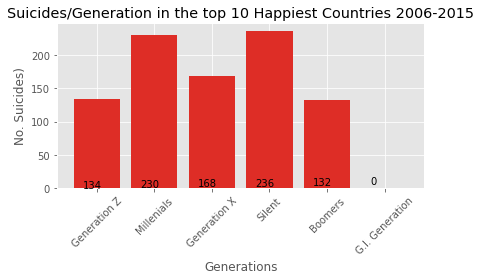

In [41]:
fig, ax = plt.subplots(sharex=True,sharey=True)


plt.title("Suicides/Generation in the top 10 Happiest Countries 2006-2015")
plt.xlabel("Generations")
plt.ylabel("No. Suicides)")

#x-axis values
x_vals = np.linspace(0,5,6)


plt.bar(x_vals, y_gen_values, color = '#de2d26')
#plt.plot(y2, alpha = .7, color = 'brown')
#ax.xtickslabel(labels = ['Generation Z', 'Millenials', 'Generation X', 'Silent', 'Boomers', 'G.I. Generation'])
ax.set_xticklabels(np.arange(6), rotation=45 )
plt.xticks(np.arange(6), ['Generation Z', 'Millenials', 'Generation X', 'Silent', 'Boomers', 'G.I. Generation'])  # Set text labels.
for i, v in enumerate(x_vals):
    ax.text(v-.25, i, str(y_gen_values[i]), color='black')
plt.tight_layout()
plt.savefig("images/suicide_by _generation")

In [42]:
# b = z.groupby("country").agg({"suicides_no":lambda x:x.sum() / , "suicides/100k pop":lambda x:x.sum() / 10})

In [43]:
#printing generational suicide data for the past 10 years

generational_suicide_10 = suicide_10.groupby("generation").sum("suicides/100k pop")
generational_suicide_10 = generational_suicide_10.drop(labels = 'year', axis =1)
generational_suicide_10 = generational_suicide_10.drop(labels = 'suicides/100k pop', axis =1)
generational_suicide_10

,suicides_no
generation,
Boomers,636436
Generation X,676467
Generation Z,15906
Millenials,443141
Silent,528922


In [44]:
global_suicide_10 = suicide_10.groupby("year").sum()
global_suicide_10

,suicides_no,suicides/100k pop
year,,
2006,233361,12166.01
2007,233408,12410.15
2008,235447,12145.84
2009,243487,12176.04
2010,238702,11843.99
2011,236484,11367.84
2012,230160,11101.91
2013,223199,10663.64
2014,222984,10306.73


In [45]:
y_sui_total = global_suicide_10["suicides/100k pop"]
y_sui_totals = np.array(y_sui_total)
y1 = list(y_sui_totals)


In [46]:
#file2['Year']
world = file2.loc[259][-15:-5]
world_pop = world.transpose()
y2 = list(world_pop)

In [47]:
percent_suicide = []
for i in y1:
    for j in y2:
        if y1.index(i) == y2.index(j):
            new_percent = i/j * 100
            percent_suicide.append(new_percent)
percent_suicide

[0.00018453662726935816,
 0.00018594203238924618,
 0.00017975140693753897,
 0.0001780233620574259,
 0.00017110951088140184,
 0.00016233090551738064,
 0.0001566784975810485,
 0.00014873253957811043,
 0.0001420776665066886,
 0.00011246632770215503]

In [48]:
avg_glb_percent = np.mean(percent_suicide)
avg_glb_percent

0.0001621648876420354

In [49]:
data = []
for i in y1:
    for j in y2:
        for k in percent_suicide:
            if y1.index(i) == y2.index(j) == percent_suicide.index(k):
                data.append([i,j,k])
data

[[12166.009999999993, 6592734559.0, 0.00018453662726935816],
 [12410.150000000005, 6674203697.0, 0.00018594203238924618],
 [12145.840000000002, 6757020825.0, 0.00017975140693753897],
 [12176.04, 6839574233.0, 0.0001780233620574259],
 [11843.990000000003, 6921877071.0, 0.00017110951088140184],
 [11367.840000000022, 7002880914.0, 0.00016233090551738064],
 [11101.909999999996, 7085790438.0, 0.0001566784975810485],
 [10663.639999999992, 7169675197.0, 0.00014873253957811043],
 [10306.730000000003, 7254292848.0, 0.0001420776665066886],
 [8253.989999999994, 7339076654.0, 0.00011246632770215503]]

In [50]:
glb_sui = pd.DataFrame(data, index = x_years, columns = ['No. of Suicides', 'Global Population', 'Percentage of the Population'])
glb_sui

,No. of Suicides,Global Population,Percentage of the Population
2006.0,12166.01,6.592735e+09,0.000185
2007.0,12410.15,6.674204e+09,0.000186
2008.0,12145.84,6.757021e+09,0.000180
2009.0,12176.04,6.839574e+09,0.000178
2010.0,11843.99,6.921877e+09,0.000171
2011.0,11367.84,7.002881e+09,0.000162
2012.0,11101.91,7.085790e+09,0.000157
2013.0,10663.64,7.169675e+09,0.000149
2014.0,10306.73,7.254293e+09,0.000142
2015.0,8253.99,7.339077e+09,0.000112


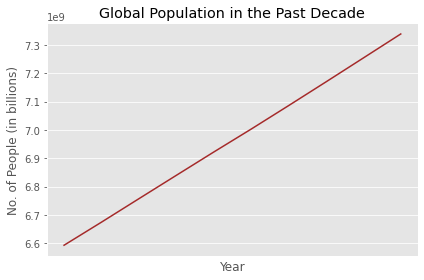

In [51]:
#Bar graph depicting the number of suicides per year from 2006-2015
ax, fig = plt.subplots(sharex=True,sharey=True)


plt.title("Global Population in the Past Decade")
plt.xlabel("Year")
plt.ylabel("No. of People (in billions)")
plt.xticks(range(2006,2016,1))
#plt.yticks(range(0,700000000,1000000))
#x-axis values
x_years = np.linspace(2006,2015,10)

#y-axis values
y1 = list(world_pop)
#y2 = list(world_pop)


plt.plot(y1, color = 'brown')
#plt.plot(y2, alpha = .7, color = 'brown')

plt.tight_layout()




#plt.subplot(1,2,1, facecolor='red')
# ax, fig = plt.subplots(1,1,sharex=True,sharey=True)


#plt.bar(years, A, color = 'b', label='A')
#plt.bar(years, increment, color = 'r', bottom = A, label='increment')

#plt.legend()



# ax, fig = plt.subplots(1,1,sharex=True,sharey=True)
# plt.bar(x_years, list(world_pop))
plt.savefig("images/Global_pop_last_decade")

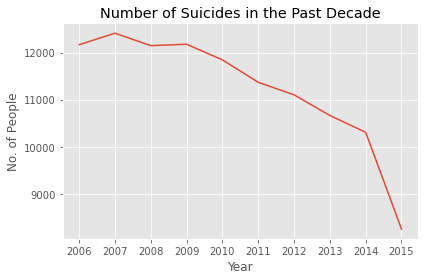

In [52]:
plt.title("Number of Suicides in the Past Decade")
plt.xlabel("Year")
plt.ylabel("No. of People")
plt.xticks(range(2006,2016,1))
#plt.yticks(range(0,13, 13))
#x-axis values
x_years = np.linspace(2006,2015,10)

#y-axis values

#y2 = list(y_sui_totals)


#plt.plot(y1, color = 'red')
#plt.plot(y2, alpha = .7, color = 'red')
plt.plot(x_years, list(y_sui_totals),)
plt.tight_layout()
plt.savefig("images/Suicide_count_last_decade")

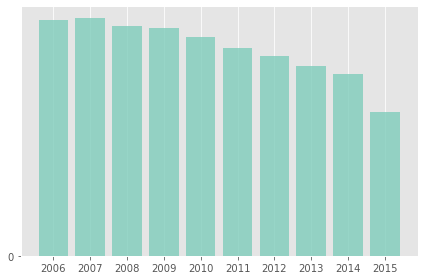

In [53]:
#percent of population has committed suicide
ax, fig = plt.subplots()

plt.bar(x_years, percent_suicide, color = '#7fcdbb', alpha = 0.8)
plt.xticks(range(2006,2016,1))
#plt.yticks(range(0,1,10))
plt.yticks(np.arange(0, max(percent_suicide),5))
#plt.set_size_inches(2,4)
plt.tight_layout()

In [54]:
global_avg = global_suicide_10['suicides_no'].mean()
global_avg

230087.2

In [55]:
#y1 = suicide totals for the decade, y2 = global population for the the decade
y1, y2

([6592734559.0,
  6674203697.0,
  6757020825.0,
  6839574233.0,
  6921877071.0,
  7002880914.0,
  7085790438.0,
  7169675197.0,
  7254292848.0,
  7339076654.0],
 [6592734559.0,
  6674203697.0,
  6757020825.0,
  6839574233.0,
  6921877071.0,
  7002880914.0,
  7085790438.0,
  7169675197.0,
  7254292848.0,
  7339076654.0])

In [56]:
suicide_10.groupby("country").sum()

,year,suicides_no,suicides/100k pop
country,,,
Albania,120480,380,178.56
Antigua and Barbuda,193008,2,23.60
Argentina,241260,30391,1135.83
Armenia,241260,683,381.27
Aruba,144612,41,424.24
...,...,...,...
United Arab Emirates,120480,526,78.84
United Kingdom,241260,44071,802.56
United States,241260,387385,1601.48


In [57]:
by_year=suicide_10.groupby('year').aggregate(np.max)
by_year

,country,suicides_no,suicides/100k pop,gdp_for_year ($),generation
year,,,,,
2006,Uruguay,14020,204.92,"989,930,542,279",Silent
2007,Uruguay,13065,172.86,"9,206,301,700",Silent
2008,Uruguay,11848,154.92,"967,199,594",Silent
2009,Uzbekistan,11721,173.86,"97,798,351,648",Silent
2010,Uzbekistan,11767,182.32,"98,381,268,000",Silent
2011,Uzbekistan,11681,185.37,"9,774,316,692",Silent
2012,Uzbekistan,11763,187.06,"93,413,992,956",Silent
2013,Uzbekistan,11396,147.59,"98,478,349,315",Silent
2014,Uzbekistan,11455,124.45,"934,185,915,467",Silent


In [58]:
by_country=by_year.groupby('country').aggregate(np.max)
by_country.head()

,suicides_no,suicides/100k pop,gdp_for_year ($),generation
country,,,,
Uruguay,14020,204.92,"997,007,926",Silent
Uzbekistan,11767,187.06,"98,478,349,315",Silent


In [59]:
#by_country.groupby("year").sum()

In [60]:
# df.loc[df['team'] == 'A', 'points'].sum()

NameError: name 'df' is not defined

In [ ]:
# suicide_10.groupby("country").sum()

Earlier in the week we had an example where our friend Matt was testing how frequently he can land kickflips.  

Suppose he wants to test his hypothesis more rigorously.  Instead of skating for a day, he spends an entire month collecting data.

**Let's say** he attempts 100 kickflips a day, for a total of 3100 kickflips, and he lands 2531 of them. Remember, he does not want to move onto another trick until he can cleanly land a kickflip 80% of the time. 

So our Null Hypothesis would take on this type of distribution:

$$ \text{# Kickflips Landed} \approx Binomial(3100, 0.8) $$

In this case, our $N$ is quite large, so it's possible that we have a computer that cannot handle the exact calculations for the binomial distribution (we don't).

Luckily a binomial with large $N$ is well approximated by a Normal distribution with the appropriate mean and variance.

$$ Binomial(3100, 0.8) \approx N(3100 \times 0.8, \sqrt{3100 \times 0.8 \times 0.2}) $$

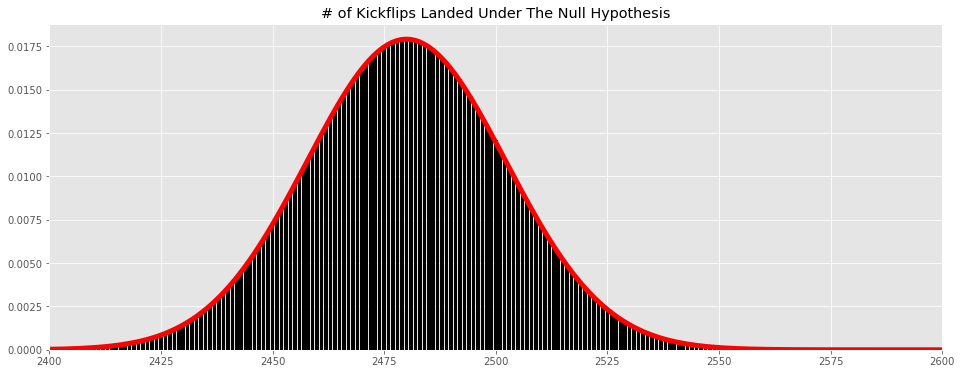

In [61]:
binomial = stats.binom(n=3100, p=0.80)
binomial_mean = 0.8 * 3100
binomial_var = 3100 * 0.8 * 0.2
normal_approx = stats.norm(binomial_mean, np.sqrt(binomial_var))
x = np.linspace(0, 3100, num=3000)

fig, ax = plt.subplots(1, figsize=(16, 6))

bar_sizes = [binomial.pmf(i) for i in range(3101)]
bars = ax.bar(range(3101), bar_sizes, color="k", align="center")
ax.plot(x, normal_approx.pdf(x), linewidth=5, c = 'r')
ax.set_xlim(2400, 2600)

ax.set_title("# of Kickflips Landed Under The Null Hypothesis");

In [ ]:
binomial = stats.binom(n=2300872, p=0.30)
binomial_mean = 0.3 * 2300872
binomial_var = 2300872 * 0.30 * 0.7
normal_approx = stats.norm(binomial_mean, np.sqrt(binomial_var))
x = np.linspace(0, 2300872, num=2300871)

fig, ax = plt.subplots(1, figsize=(16, 6))

bar_sizes = [binomial.pmf(i) for i in range(2300872)]
bars = ax.bar(range(2300872), bar_sizes, color="k", align="center")
ax.plot(x, normal_approx.pdf(x), linewidth=5, c = 'r')
ax.set_xlim(2000000, 2300872)
plt.tight_layout()
ax.set_title("# Boomer Suicides Under The Null Hypothesis");
plt.show()

In [ ]:
The approximation here is very goody so we can replace the exact Binomial distribution with the approximate Normal distribution.

```python
binomial_mean = 0.8 * 3100
binomial_var = 3100 * 0.8 * 0.2
normal_approx = stats.norm(binomial_mean, np.sqrt(binomial_var))
```

The p-value for this one-month experiment is:

What is the probability that we will see this data (2531 Kickflips) or more extreme under the null hypothesis?

$$ P(\geq \text{ 2531 Kickflips Landed} \mid \text{Null Hypothesis} ) $$

In [ ]:
p_value = 1 - normal_approx.cdf(2510)
print("p-value for one month kickflip experiment: {:2.2f}".format(p_value))

In [ ]:
fig, ax = plt.subplots(1, figsize=(16, 3))

ax.plot(x, normal_approx.pdf(x), linewidth=3)
ax.set_xlim(2400, 2600)
ax.fill_between(x, normal_approx.pdf(x), 
                where=(x >= 2530), color="red", alpha=0.5)
ax.set_title("p-value Region");